# 01 — Data Exploration

In [2]:
import sys, os, gc
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 60)
pd.set_option("display.width", 140)

print("Python:", sys.executable)

Python: /home/nissotti/projects/industry-classification/.venv/bin/python


In [27]:
import pickle
df_train = pd.read_pickle("../data/df_train.pkl")

### Information on the data from df_train.pkl:
id:
- A unique identifier for each company
- Useful for merging/joining with other datasets (like the financials one)
- Not a feature for training (we drop it)

industry:
- The label (target variable) we want to predict
- Each row belongs to some industry class (like "Finance", "Healthcare", etc)
- This is our y when training classifiers

business_description_embedding:
- Instead of giving raw text descriptions (like "A company that develops renewable energy solutions..."), the dataset already has those descriptions turned into embeddings
- An embedding is a vector of numbers (hundreds or thousands of floats) that encodes the meaning of the text
    - Similar companies will have similar embeddings
    - Different companies will have embeddings that are far apart

Conclusion:

id -> just an identifier \
industry -> what we want to predict (classification target) \
business_description_embedding -> the features (the input to classifiers/PCA)

In [ ]:
df_train.shape # shows how many rows and columns there are

(31706, 3)

In [ ]:
df_train.head(5) # shows the first 5 rows

,id,industry,business_description_embedding
38532,42576,Banks,"[0.03411475,-0.03753958,0.023233214,-0.0017205..."
19838,21752,Materials,"[-0.025557408,0.0636078,-0.01350581,-0.0180223..."
904,804,Commercial & Professional Services,"[0.033574868,-0.020379327,-0.03221274,-0.01133..."
28806,31603,Insurance,"[0.020648101,0.017270269,-0.032921147,-0.01411..."
10472,11333,Capital Goods,"[-0.0006651232,0.011097765,-0.01976973,0.02299..."


In [ ]:
df_train.info() # shows the column names, data types and how many non-nulls (helps spot missing data) -> here there is no missing data

<class 'pandas.core.frame.DataFrame'>
Index: 31706 entries, 38532 to 15797
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              31706 non-null  int64 
 1   industry                        31706 non-null  object
 2   business_description_embedding  31706 non-null  object
dtypes: int64(1), object(2)
memory usage: 990.8+ KB


In [34]:
df_train["industry"].nunique()

25

In [ ]:
df_train["industry"].value_counts()

industry
Materials                                         8394
Capital Goods                                     3127
Financial Services                                1936
Pharmaceuticals, Biotechnology & Life Sciences    1925
Technology Hardware & Equipment                   1547
Software & Services                               1537
Energy                                            1326
Consumer Durables & Apparel                       1164
Food, Beverage & Tobacco                          1094
Health Care Equipment & Services                  1014
Banks                                              948
Media & Entertainment                              915
Real Estate Management & Development               906
Commercial & Professional Services                 804
Consumer Services                                  672
Consumer Discretionary Distribution & Retail       658
Automobiles & Components                           625
Semiconductors & Semiconductor Equipment           607
T

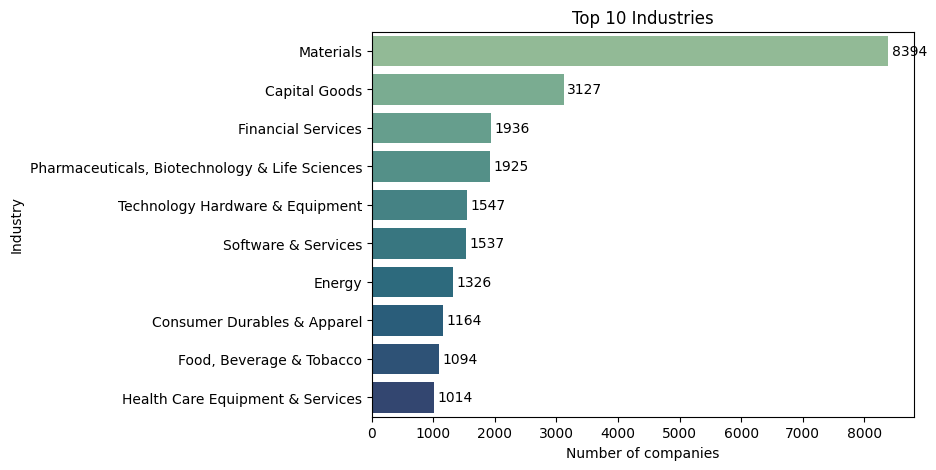

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# prepare the counts
top_industries = df_train["industry"].value_counts().head(10).reset_index()
top_industries.columns = ["industry", "count"]

# plot
plt.figure(figsize=(7,5))
ax = sns.barplot(
    data=top_industries,
    y="industry", x="count",
    hue="industry",
    dodge=False, # ensures bars don’t split
    legend=False, # no legend needed since labels are on y-axis
    palette="crest"
)
plt.xlabel("Number of companies")
plt.ylabel("Industry")
plt.title("Top 10 Industries")

# add text labels
for i, v in enumerate(top_industries["count"]):
    ax.text(v + 50, i, str(v), va="center") # shift labels to the right of bars
plt.show()



In [37]:
df_train["business_description_embedding"].iloc[0][:10]

'[0.0341147'

The output of the previous line of code shows that the embeddings are still stored as strings, not as actual lists/arrays of numbers

In [38]:
import ast
import numpy as np

# Convert the string into a real list
parsed = ast.literal_eval(df_train["business_description_embedding"].iloc[0])
print(type(parsed), len(parsed))
print(parsed[:10])  # first 10 numbers

<class 'list'> 768
[0.03411475, -0.03753958, 0.023233214, -0.0017205259, -0.004963611, 0.04651084, -0.012529841, 0.036100857, -0.035567928, -0.029617134]


In [39]:
df_train["business_description_embedding"] = df_train["business_description_embedding"].map(ast.literal_eval)


In [49]:
print(df_train["business_description_embedding"].iloc[0][:10], "...")

[0.03411475, -0.03753958, 0.023233214, -0.0017205259, -0.004963611, 0.04651084, -0.012529841, 0.036100857, -0.035567928, -0.029617134] ...
